In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
# get directory
curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)  # I go up
os.chdir(parent_dir)
print(parent_dir)

/Users/luciapapalini/Desktop/cmepda


In [6]:
import keras

In [32]:
history = np.load("trained/test_encoder/history.npy", allow_pickle=True).item()

In [33]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

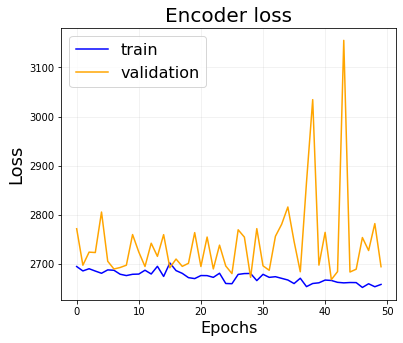

In [34]:
# epochs
epochs = np.arange(len(history.history['loss']))

# plot LOSS

plt.figure(figsize=(6, 5))
plt.title("Encoder loss", fontsize=20)
plt.plot(epochs[:], history.history['loss'][:], color='blue', label='train')
plt.plot(epochs[:], history.history['val_loss'][:], color='orange', label='validation')
plt.legend(fontsize=16)
plt.grid(alpha=0.2)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=18)
plt.savefig("docs/slides/figures/enc_loss.png")

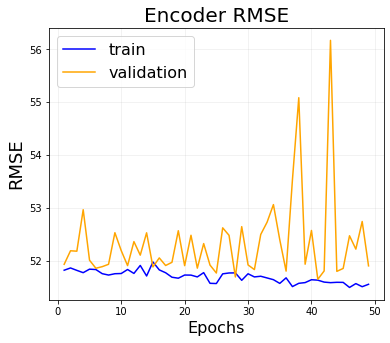

In [35]:
# epochs
epochs = np.arange(len(history.history['loss']))

# plot LOSS

plt.figure(figsize=(6, 5))
plt.title("Encoder RMSE", fontsize=20)
plt.plot(epochs[1:], history.history['root_mean_squared_error'][1:], color='blue', label='train')
plt.plot(epochs[1:], history.history['val_root_mean_squared_error'][1:], color='orange', label='validation')
plt.legend(fontsize=16)
plt.grid(alpha=0.2)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('RMSE', fontsize=18)
plt.savefig("docs/slides/figures/enc_rmse.png")